## Racial data vs. Congressional districts

We are now awash with data from different sources, but pulling it all together to gain insights can be difficult for many reasons.  In this notebook we show how to combine data of very different types to show previously hidden relationships:

* **"Big data"**: 300 million points indicating the location and racial or ethnic category of each resident of the USA in the 2010 census.  See the [datashader census notebook](https://anaconda.org/jbednar/census) for a detailed analysis.  Most tools would need to massively downsample this data before it could be displayed.
* **Map data**: Image tiles from ArcGIS showing natural geographic boundaries.  Requires alignment and overlaying to match the census data.
* **Geographic shapes**: 2015 Congressional districts for the USA, downloaded from census.gov.  Requires reprojection to match the coordinate system of the image tiles.

Few if any tools can alone handle all of these data sources, but here we'll show how freely available Python packages can easily be combined to explore even large, complex datasets interactively in a web browser.  The resulting plots make it simple to explore how the racial distribution of the USA population corresponds to the geographic features of each region and how both of these are reflected in the shape of US Congressional districts.  For instance, here's an example of using this notebook to zoom in to Houston, revealing a very precisely [gerrymandered](https://en.wikipedia.org/wiki/Gerrymandering_in_the_United_States) [Hispanic district](https://green.house.gov/about/our-district):

![Houston district 29](./assets/houston_district29.png)

Here the US population is rendered using racial category using the key shown, with more intense colors indicating a higher population density in that pixel, and the geographic background being dimly visible where population density is low.  Racially integrated neighborhoods show up as intermediate or locally mixed colors, but most neighborhoods are quite segregated, and in this case the congressional district boundary shown clearly follows the borders of this segregation.

If you run this notebook and zoom in on any urban region of interest, you can click on an area with a concentration of one racial or ethnic group to see for yourself if that district follows geographic features, state boundaries, the racial distribution, or some combination thereof.

Numerous Python packages are required for this type of analysis to work, all coordinated using [conda](http://conda.pydata.org):

* [Numba](http://numba.pydata.org): Compiles low-level numerical code written in Python into very fast machine code
* [Dask](http://dask.pydata.org): Distributes these numba-based workloads across multiple processing cores in your machine
* [Datashader](http://datashader.readthedocs.io): Using Numba and Dask, aggregates big datasets into a fixed-sized array suitable for display in the browser
* [GeoViews](http://geo.holoviews.org/) (using [Cartopy](http://scitools.org.uk/cartopy)): Project longitude, latitude shapes into Web Mercator and create visible objects
* [HoloViews](http://holoviews.org/): Flexibly combine each of the data sources into a just-in-time displayable, interactive plot
* [Bokeh](http://bokeh.pydata.org/): Generate JavaScript-based interactive plot from HoloViews declarative specification

Each package is maintained independently and focuses on doing one job really well, but they all combine seamlessly and with very little code to solve complex problems.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
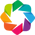

In [1]:
import holoviews as hv
from holoviews import opts
import geoviews as gv
import datashader as ds
import dask.dataframe as dd
from cartopy import crs

from holoviews.operation.datashader import datashade

hv.extension('bokeh', width=95)

opts.defaults(
    opts.Points(apply_ranges=False, ),
    opts.RGB(width=1200, height=682, xaxis=None, yaxis=None, show_grid=False),
    opts.Shape(fill_alpha=0, line_width=1.5, apply_ranges=False, tools=['tap']),
    opts.WMTS(alpha=0.5)
)

In this notebook, we'll load data from different sources and show it all overlaid together.  First, let's define a color key for racial/ethnic categories:

In [2]:
color_key = {'w':'blue',  'b':'green', 'a':'red',   'h':'orange',   'o':'saddlebrown'}
races     = {'w':'White', 'b':'Black', 'a':'Asian', 'h':'Hispanic', 'o':'Other'}

color_points = hv.NdOverlay(
    {races[k]: gv.Points([0,0], crs=crs.PlateCarree()).opts(color=v) for k, v in color_key.items()})

Next, we'll load the 2010 US Census, with the location and race or ethnicity of every US resident as of that year (300 million data points), and define a plot using datashader to show this data with the given color key:

In [3]:
df = dd.io.parquet.read_parquet('./data/census.snappy.parq')
df = df.persist()
census_points = hv.Points(df, kdims=['easting', 'northing'], vdims=['race'])

Now we can datashade and render these points, coloring the points by race:

In [4]:
x_range, y_range = ((-13884029.0, -7453303.5), (2818291.5, 6335972.0)) # Continental USA
shade_defaults = dict(x_range=x_range, y_range=y_range, x_sampling=10, y_sampling=10, width=1200, height=682,
                      color_key=color_key, aggregator=ds.count_cat('race'),)
shaded = datashade(census_points, **shade_defaults)
shaded

:DynamicMap   []
   :RGB   [easting,northing]   (R,G,B,A)

Next, we'll load congressional districts from a publicly available [shapefile](https://www.census.gov/geo/maps-data/data/cbf/cbf_cds.html) and project them into Web Mercator format using GeoViews (which in turn calls Cartopy):

In [5]:
shape_path = './data/congressional_districts'
districts = gv.Shape.from_shapefile(shape_path, crs=crs.PlateCarree())
districts = gv.project(districts)

ShapefileException: Unable to open ./data/congressional_districts.dbf or ./data/congressional_districts.shp.

Finally, we'll define some image tiles to use as a background, using any publicly available Web Mercator tile set:

In [ ]:
tiles = gv.WMTS('https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{Z}/{Y}/{X}.jpg')

Each of these data sources can be visualized on their own (just type their name in a separate cell), but they can also easily be combined into a single overlaid plot to see the relationships:

In [ ]:
opts.defaults(
    opts.Polygons(fill_alpha=0))

In [ ]:
shaded = datashade(census_points, **shade_defaults)
tiles * shaded * color_points * districts

You should now be able to interactively explore these three linked datasets, to see how they all relate to each other.  In a live notebook, this plot will support a variety of interactive features:

* Pan/zoom: Select the "wheel zoom" tool at the left, and you can zoom in on any region of interest using your scroll wheel.  The shapes should update immediately, while the map tiles will update as soon as they are loaded from the external server, and the racial data will be updated once it has been rendered for the current viewport by datashader.  This behavior is the default for any HoloViews plot using a Bokeh backend.
* Tapping: click on any region of the USA and the Congressional district for that region will be highlighted (and the rest dimmed).  This behavior was enabled for the shape outlines by specifying the "tap" tool in the options above.

Most of these interactive features are also available in the static HTML copy visible at [anaconda.org](https://anaconda.org/jbednar/census-hv-dask), with the restriction that because there is no Python process running, the racial/population data will be limited to the resolution at which it was initially rendered, rather than being dynamically re-rendered to fit the current zoom level.  Thus in a static copy, the data will look pixelated, whereas in the live server you can zoom all the way down to individual datapoints (people) in each region.